In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
#f = r.TFile("./data/gm2offline_ana.root")
#f = r.TFile("./data/gm2offline_ana_onlyAboveThresholdClusters.root")
#f = r.TFile("./data/results_9files_truncationComparison.root")
#f = r.TFile("./data/gm2offline_ana_sameClustering.root")
f = r.TFile("./data/results_10MissingOutputFiles_9day_histOnly.root")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	farlineTrunc;1	farlineTrunc (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	clusterCompare;1	clusterCompare (ReconComparisonTruncatedVsFull) folder


---

### Lets first grab Aarons clustering

In [3]:
clusters = f.Get("clustersAndCoincidences").Get("clusters").Clone("clusters")
clustersTrunc = f.Get("clustersAndCoincidencesTrunc").Get("clusters").Clone("clustersTrunc")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


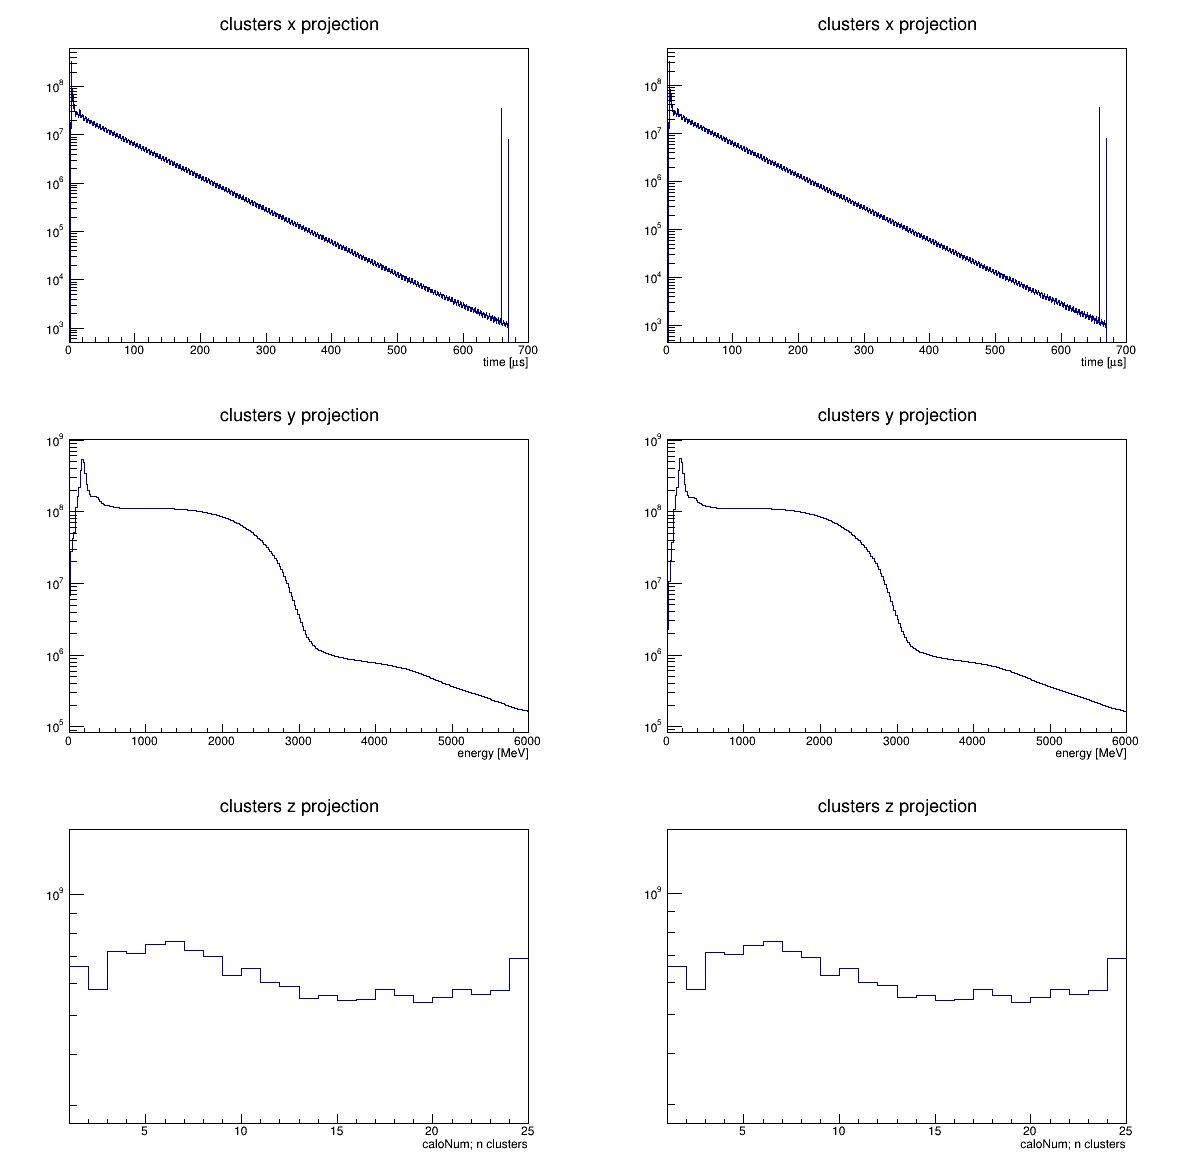

In [6]:
c = r.TCanvas("c","c",1200,1200)
c.Divide(2,3)

c.cd(1)
clusters.Project3D("x").Draw()
r.gPad.SetLogy()

c.cd(2)
clustersTrunc.Project3D("x").Draw()
r.gPad.SetLogy()

c.cd(3)
clusters.Project3D("y").Draw()
r.gPad.SetLogy()

c.cd(4)
clustersTrunc.Project3D("y").Draw()
r.gPad.SetLogy()

c.cd(5)
clusters.Project3D("z").Draw()
r.gPad.SetLogy()

c.cd(6)
clustersTrunc.Project3D("z").Draw()
r.gPad.SetLogy()

c.Draw()

---

### Now lets look into the number of clusters in each version of this plot, by energy

In [24]:
tmin = 30 #mus
tmax = 650

emin = 1700 #MeV
emax = 3100

caloMin = 0
caloMax = 25

In [25]:
clusters.GetXaxis().SetRangeUser(tmin, tmax)
clusters.GetYaxis().SetRangeUser(emin, emax)
clusters.GetZaxis().SetRangeUser(caloMin, caloMax)

clustersTrunc.GetXaxis().SetRangeUser(tmin, tmax)
clustersTrunc.GetYaxis().SetRangeUser(emin, emax)
clustersTrunc.GetZaxis().SetRangeUser(caloMin, caloMax)

cTime = clusters.Project3D("x").Clone("cTime")
cTimeTrunc = clustersTrunc.Project3D("x").Clone("cTimeTrunc")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


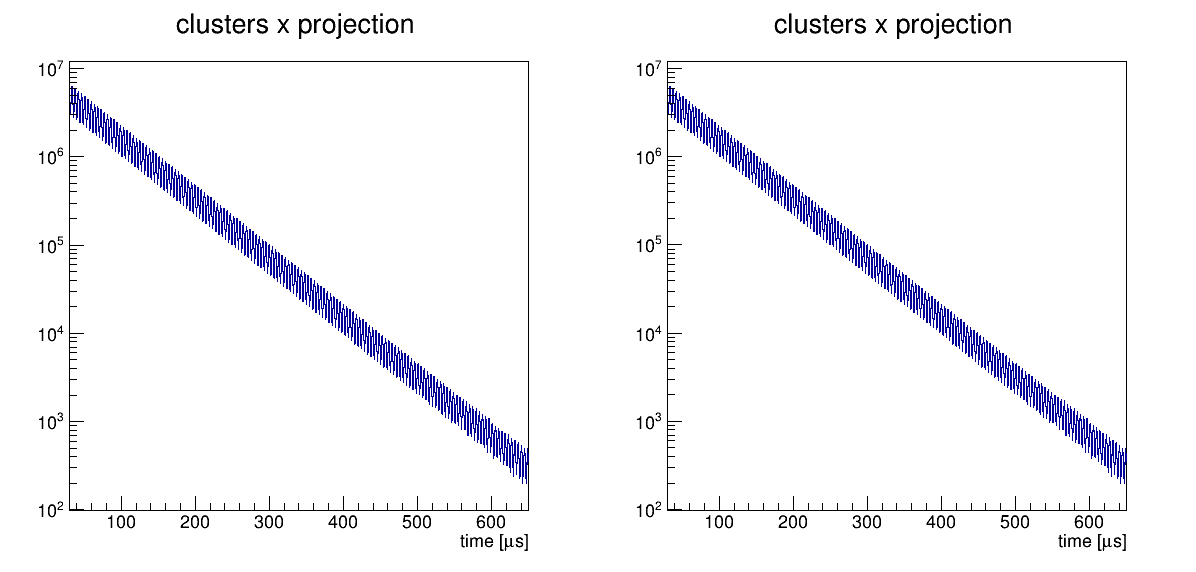

In [26]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)

c.cd(1)
cTime.Draw()
r.gPad.SetLogy()

c.cd(2)
cTimeTrunc.Draw()
r.gPad.SetLogy()

c.Draw()

In [27]:
Nfull = cTime.Integral()
Ntrunc = cTimeTrunc.Integral()

print(Nfull, Ntrunc)

2095340306.0 2091668257.0


In [28]:
deltaN = Nfull - Ntrunc
print("deltaN =", deltaN)
print("       =",deltaN/Nfull * 100,"% of Nfull")

deltaN = 3672049.0
       = 0.17524833505493595 % of Nfull


---

### Now lets try to compare the differences between the full and full (missing file) files

In [29]:
f2 = r.TFile("./data/results_1MissingFile_FullVsTrunc.root")
clustersMissing = f2.Get("clustersAndCoincidences").Get("clusters").Clone("clusters")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


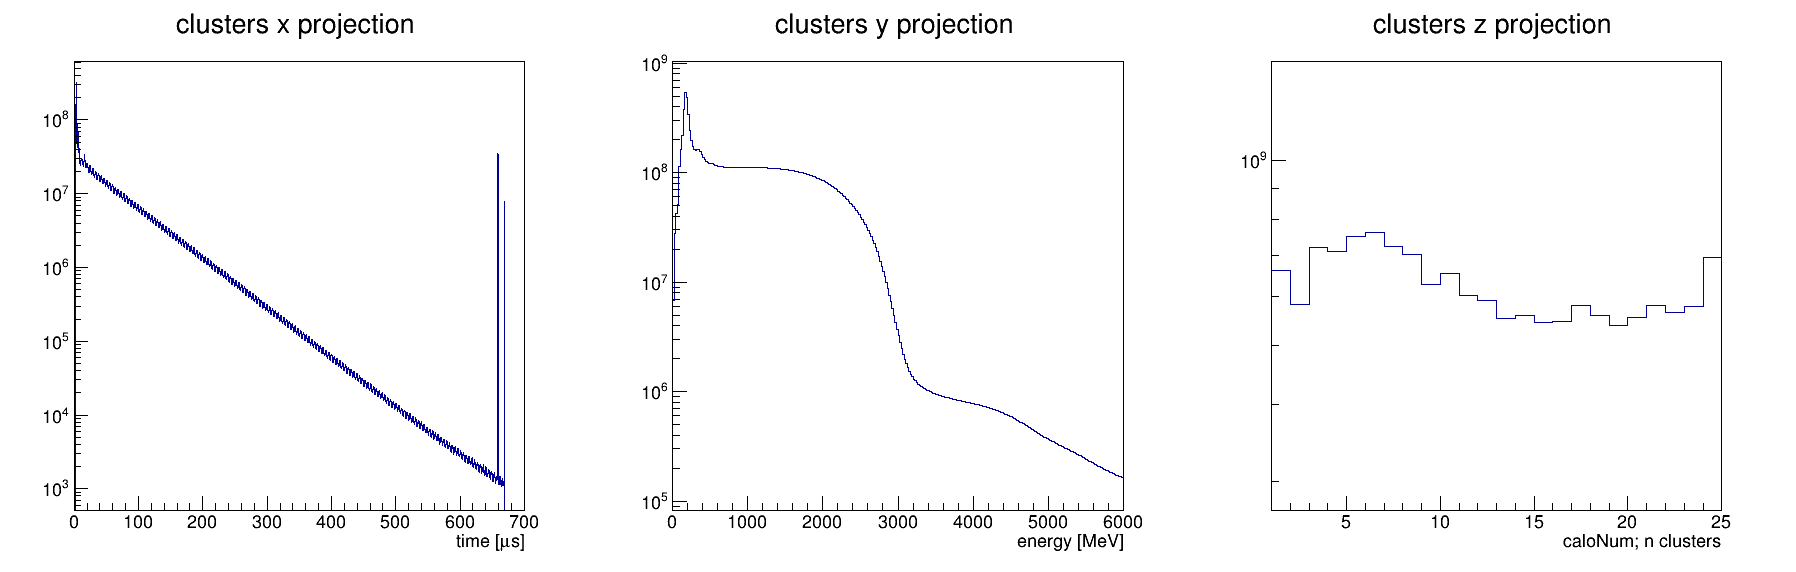

In [31]:
c = r.TCanvas("c","c",1800,600)
c.Divide(3)

c.cd(1)
clustersMissing.Project3D("x").Draw()
r.gPad.SetLogy()


c.cd(2)
clustersMissing.Project3D("y").Draw()
r.gPad.SetLogy()

c.cd(3)
clustersMissing.Project3D("z").Draw()
r.gPad.SetLogy()


c.Draw()

In [32]:
clustersMissing.GetXaxis().SetRangeUser(tmin, tmax)
clustersMissing.GetYaxis().SetRangeUser(emin, emax)
clustersMissing.GetZaxis().SetRangeUser(caloMin, caloMax)

cTimeMissing = clustersMissing.Project3D("x").Clone("cTimeMissing")

In [33]:
Nmiss = cTimeMissing.Integral()
print(Nmiss)

2090291970.0


In [34]:
deltaN2 = Nfull - Nmiss
print("deltaN =", deltaN2)
print("       =",deltaN2/Nfull * 100,"% of Nfull")

deltaN = 5048336.0
       = 0.2409315558691878 % of Nfull


In [40]:
print("Difference in deltaN =", np.abs(deltaN - deltaN2))
print("                     =", np.abs(deltaN - deltaN2)/deltaN * 100,"%")

Difference in deltaN = 1376287.0
                     = 37.480082645955974 %


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


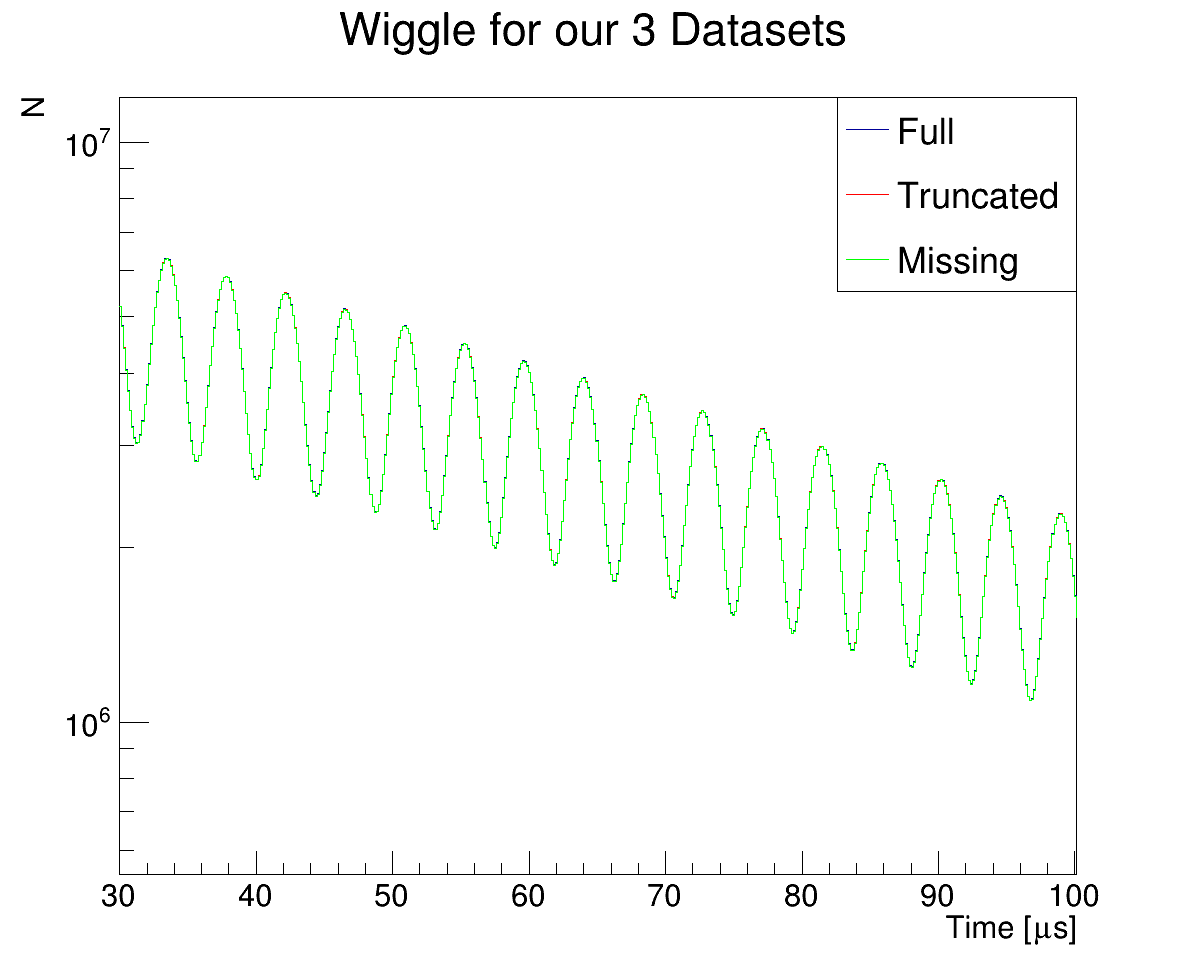

In [53]:
c = r.TCanvas("c","c",1200,1000)

cTime.Draw()
cTimeTrunc.Draw("SAME")
cTimeTrunc.SetLineColor(2)
cTimeMissing.Draw("SAME")
cTimeMissing.SetLineColor(3)

leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(cTime, "Full", "l")
leg.AddEntry(cTimeTrunc, "Truncated", "l")
leg.AddEntry(cTimeMissing, "Missing", "l")
leg.Draw()

c.SetLogy()
cTime.GetXaxis().SetRangeUser(30,100)
cTime.SetTitle("Wiggle for our 3 Datasets; Time [#mus]; N")

c.Draw()